# White Box Model - Decision Tree Classification - (Dataset Iris)

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

In [3]:
type(iris)


sklearn.utils.Bunch

In [4]:
X = iris.data
y = iris.target


In [5]:
print(type(iris.data))
print(type(iris.target))
print("iris.data", iris.data.shape)
print("iris.target", iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
iris.data (150, 4)
iris.target (150,)


In [6]:
iris['feature_names'] # 4 features only

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(X,columns=iris['feature_names'])
df_features = df.copy()

In [8]:
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['Iris-class'] = y

# Iris Dataset

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris-class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# EDA - Exploratory Data Analysis

In [14]:
# Correlation
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Iris-class,0.782561,-0.426658,0.949035,0.956547,1.000000


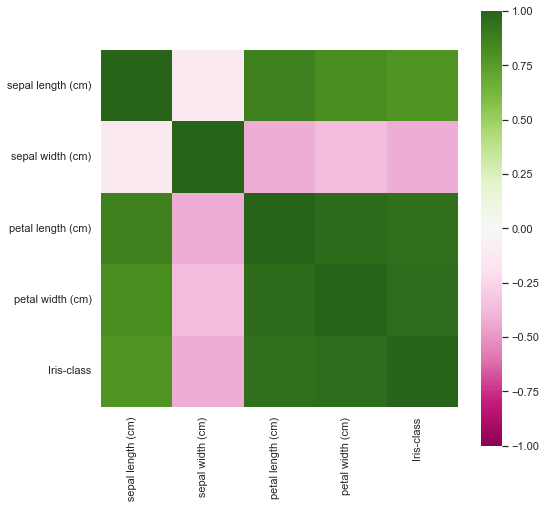

In [15]:
# Plot correlation heatmap

# Plot these values on heatmap

sns.set(style = 'whitegrid')
sns.set_palette('bright')

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap='PiYG',
            square=True,
            ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');


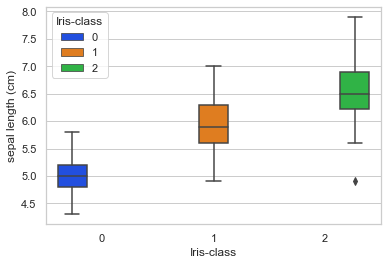

In [16]:
sns.boxplot(y='sepal length (cm)', x='Iris-class', hue='Iris-class', data=df)
plt.show()


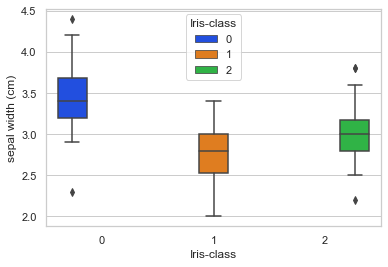

In [17]:
sns.boxplot(y='sepal width (cm)', x='Iris-class', hue='Iris-class', data=df)
plt.show()

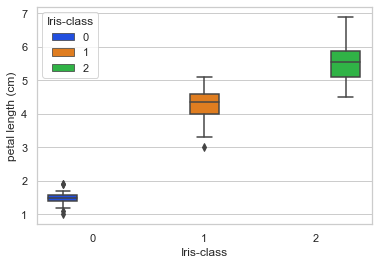

In [18]:
sns.boxplot(y='petal length (cm)', x='Iris-class', hue='Iris-class', data=df)
plt.show()

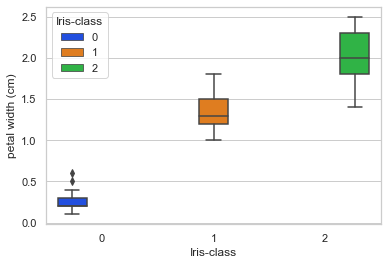

In [19]:
sns.boxplot(y='petal width (cm)', x='Iris-class', hue='Iris-class', data=df)
plt.show()

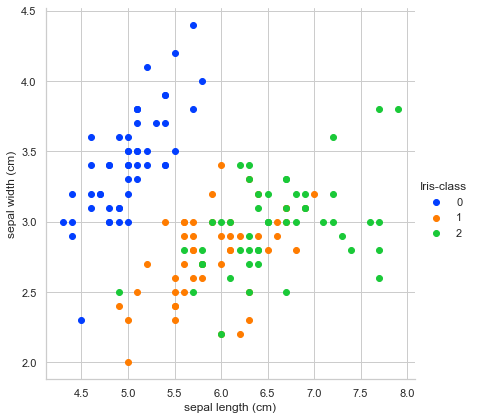

In [20]:
# Visualize 2 features based on target variable
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Iris-class',height=(6)) \
    .map(plt.scatter,'sepal length (cm)', 'sepal width (cm)') \
    .add_legend()
plt.show()


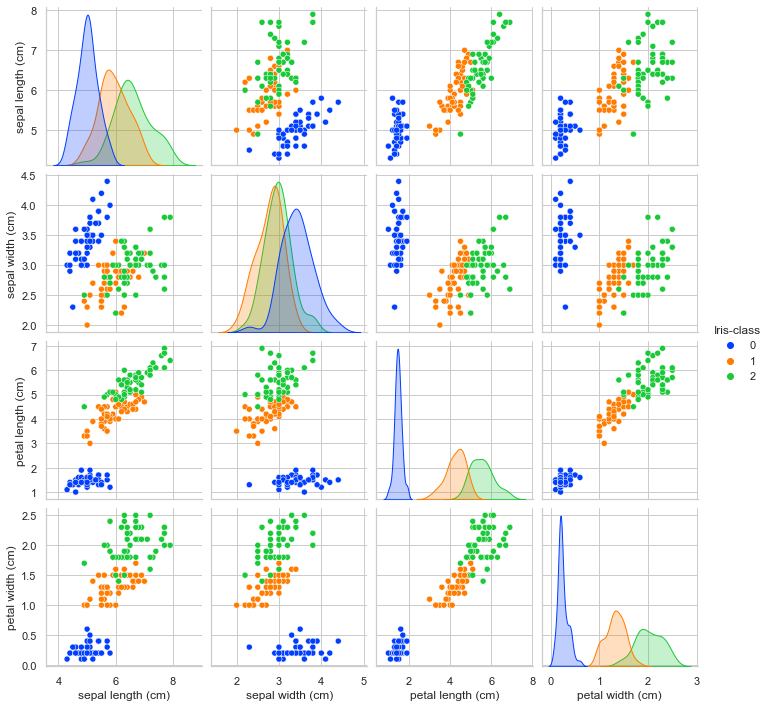

In [21]:
sns.pairplot(df,hue='Iris-class',palette='bright')
plt.show()

# Modelling

In [22]:
# Training Decision Tree model - depth=None (Tree v large, all features)
# dt_model1 with depth 3 just to see binary tree function

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate
dt_model = DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
#dt_model1 = DecisionTreeRegressor(max_depth=3,random_state=42)


# Fit
dt_model.fit(X_train, y_train)
#dt_model1.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
# mae = np.mean(np.abs(y_test - y_pred))
# print(mae)

# What makes Decision tree white box ?
## 1. BINARY TREE-
### It can be visualized as a bunch of if-else conditions strung together where each condition splits data into 2. This model can be easily visualized as a binary tree.
## 2. FEATURE IMPORTANCE-
### Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. The most important features will be higher in the tree. A single feature can be used in different branches of the tree, feature importance then is its total contribution in reducing the impurity

# Binary Tree

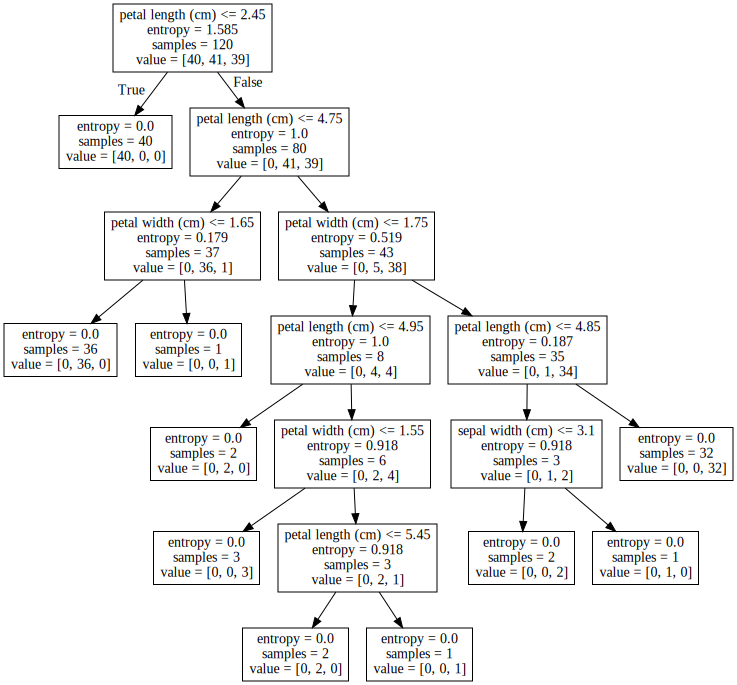

In [23]:
# Visualize tree
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz


dot_data = tree.export_graphviz(dt_model,
                                feature_names=df_features.columns,
                                out_file=None)
graph = graphviz.Source(dot_data)
graph

# Evaluation

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

1.0

# Feature Importance

In [25]:
# Get feature importance from trained decision tree model
weights = dt_model.feature_importances_
print(weights)

[0.         0.01448725 0.89540577 0.09010698]


In [26]:
feature_importance_index = np.argsort(np.abs(weights))[::-1]
print(feature_importance_index)

[2 3 1 0]


In [27]:
feature_importance_names = [df.columns[idx].upper() for idx in feature_importance_index]
feature_importance_names

['PETAL LENGTH (CM)',
 'PETAL WIDTH (CM)',
 'SEPAL WIDTH (CM)',
 'SEPAL LENGTH (CM)']

In [28]:
feature_importance_values = [weights[idx] for idx in feature_importance_index]
print(feature_importance_values)

[0.8954057704812955, 0.09010697786182895, 0.014487251656875581, 0.0]


Text(0, 0.5, 'Features')

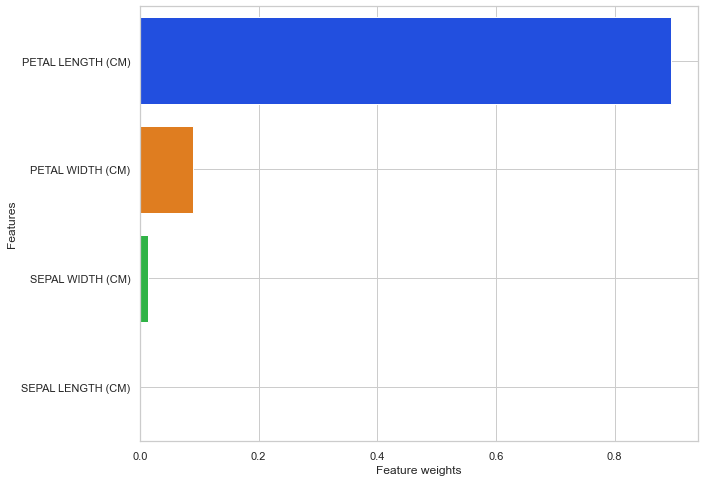

In [29]:
# Plot

f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=feature_importance_values, y=feature_importance_names, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature weights')
ax.set_ylabel('Features')